## This Report is Smith Haven Mall local (Lake Grove) shopping. Data scrpaed from foursquare 

## Summary: Besides the biggest shopping mall and department store, people in Lake Grove are mostly crowded in Clothing Store, Women's Store, and bookstore. This is consistent with votes in our result. Bookstore, hunting supply and athletics sports are some top predered categories by local people without being mentioned in our votes. Some potential future work is mentioned at last. 

In [15]:
_author_ = "Peimeng Sui"
import selenium
import time,re,json,numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import matplotlib
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib
import pdb
import foursquare
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import glob
%matplotlib inline
from textblob import TextBlob
import math
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
frame = pd.read_pickle("Lake Grove_shopping.pkl")

In [5]:
frame.shape

(108, 12)

In [6]:
data1=[]
data1 = frame[~frame.index.duplicated(keep='first')]
data1.shape

(81, 12)

In [7]:
data1 = data1[data1["tips"]>0]

In [9]:
data1.shape

(48, 12)

In [10]:
data1.head()

,checkins,likes,photos,sub_cat,tips,users,visits,Category,zone,venue,tips_text,category
49fe3ab5f964a520846f1fe3,2548,13,14,"[Toy / Game Store, Department Store, Kids Store]",6,815,2613,shopping,Lake Grove,babies-r-us,[lights in the back departments are obnoxious ...,shopping
4a077d66f964a52069731fe3,5674,94,56,[Bookstore],20,2196,5964,shopping,Lake Grove,barnes--noble,[just love the atmosphere of a bookstore! kin...,shopping
4ac8cda2f964a520a6bc20e3,3875,31,18,"[Sporting Goods Shop, Hunting Supply, Athletic...",13,1683,4436,shopping,Lake Grove,dicks-sporting-goods,"[large variety of merchandise and free wifi., ...",shopping
4aedd881f964a52075cf21e3,1714,8,2,"[Clothing Store, Boutique, Women's Store]",2,622,1722,shopping,Lake Grove,american-eagle-outfitters,[all bras are 40% off!! and ae rewards members...,shopping
4aede151f964a520d7cf21e3,1349,7,5,"[Clothing Store, Shoe Store]",3,232,1365,shopping,Lake Grove,jcrew,"[for men: quality casual button-downs, and the...",shopping


## Each instance in our data is a specific shopping venue. The variables we have are checkins, likes, photos, sub categories, users,visits, tips text.

In [13]:
def get_sentiment_score(txt):
    text=[]
    for tips in txt:
        text.append(re.sub(r'^https?:\/\/.*[\r\n]*', '', tips, flags=re.MULTILINE))
    polarity=[]
    for tip in text:
        testimonial = TextBlob(tip)
        polarity.append(testimonial.sentiment.polarity)
    vals=np.array(polarity)
    if vals.size != 0:
        score = sum(vals>0)/(vals.size)
        return score
    else : 
        return 0
data1["sentiment_score"]=data1["tips_text"].apply(get_sentiment_score)

## Calculate a sentiment score for each venue, representing how positive are the tips they received. Score is from zero to one, higher score means more positive

## Let's checkout the data sorted by number of checkins received

In [56]:
data1.sort("checkins",ascending = False).head(n=10)

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,checkins,likes,photos,sub_cat,tips,users,visits,Category,zone,venue,tips_text,category,sentiment_score
4b3f6364f964a52040a625e3,42335,362,210,[Shopping Mall],40,10718,44071,shopping,Lake Grove,smith-haven-mall,"[food: cheesecake factory, california pizza ki...",shopping,0.550000
4a077d66f964a52069731fe3,5674,94,56,[Bookstore],20,2196,5964,shopping,Lake Grove,barnes--noble,[just love the atmosphere of a bookstore! kin...,shopping,0.800000
4b3e32d7f964a520779925e3,4830,74,22,"[Department Store, Clothing Store, Cosmetics S...",10,2526,5587,shopping,Lake Grove,macys,[these people are so genuine with their sugges...,shopping,0.400000
4ac8cda2f964a520a6bc20e3,3875,31,18,"[Sporting Goods Shop, Hunting Supply, Athletic...",13,1683,4436,shopping,Lake Grove,dicks-sporting-goods,"[large variety of merchandise and free wifi., ...",shopping,0.500000
49fe3ab5f964a520846f1fe3,2548,13,14,"[Toy / Game Store, Department Store, Kids Store]",6,815,2613,shopping,Lake Grove,babies-r-us,[lights in the back departments are obnoxious ...,shopping,0.500000
4bddebebffdec928daf6e6a1,2258,22,4,"[Lingerie Store, Women's Store]",5,943,2270,shopping,Lake Grove,victorias-secret-pink,[love their sweats! but are you worried your t...,shopping,0.800000
4aedd881f964a52075cf21e3,1714,8,2,"[Clothing Store, Boutique, Women's Store]",2,622,1722,shopping,Lake Grove,american-eagle-outfitters,[all bras are 40% off!! and ae rewards members...,shopping,1.000000
4e57ad67e4cd6acbd75eb3a0,1619,13,10,[Clothing Store],1,623,1637,shopping,Lake Grove,old-navy,[it's hit or miss with styles and clothes. goo...,shopping,0.500000
4b7d8690f964a52070c42fe3,1480,7,12,"[Department Store, Women's Store, Men's Store]",3,812,1502,shopping,Lake Grove,jcpenney,[much more friendly than the store in the mall...,shopping,0.666667
4bdb5ef063c5c9b693a12768,1462,10,14,[Toy / Game Store],2,468,1467,shopping,Lake Grove,disney-store,[everything is so cute. the steady is so nice ...,shopping,0.500000


## We can see here Smith Haven shopping mall received 42335 checkins in total, leading all venues.
## Most of the stores are inside the mall or surrounding area. Our goal is to find preference of people shopping in Lake Grove 
## Interestingly, the bookstore barnes noble is at the second place, even higher than macys.

(array([ 31.,  13.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.85797388e-03,   1.96263191e-01,   3.90668409e-01,
          5.85073626e-01,   7.79478844e-01,   9.73884061e-01,
          1.16828928e+00,   1.36269450e+00,   1.55709971e+00,
          1.75150493e+00,   1.94591015e+00]),
 <a list of 10 Patch objects>)

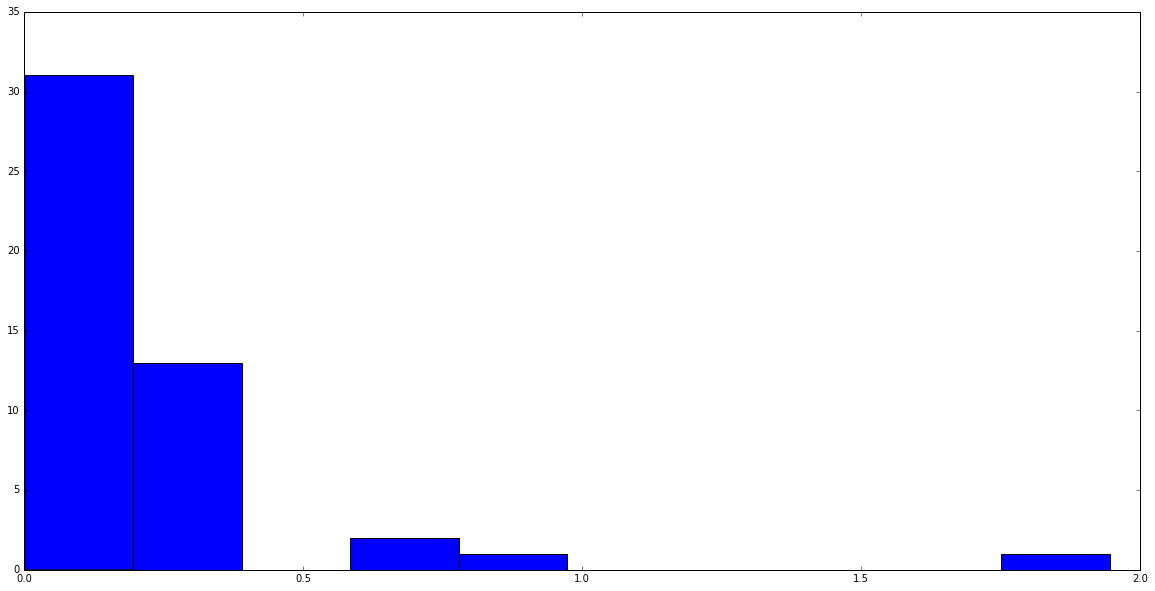

In [19]:
score_data = data1[["checkins","likes","photos","tips","users","visits"]]

data1["score"] = ((score_data - score_data.min()) / (score_data.max() - score_data.min())).sum(axis=1)
data1["score"] = np.log1p(data1["score"])
plt.hist(data1["score"])

## This score shown above, which I will call it preference index, is caculated for each venue as the average of all scaled variables. The higher preference index represents local people's choices

## How does the performance vary among different shopping categories?

In [21]:
data1=pd.concat([data1,data1["sub_cat"].str.join(sep=',').str.get_dummies(sep=',')],axis=1)

In [24]:
names = []
checkins = []
for col in data1.columns[14:]:
    names.append(data1.groupby(col)["checkins"].sum().index.name)
    checkins.append(data1.groupby(col)["checkins"].sum().values[1])
dicts = {}
for i in range(len(names)):
    dicts[names[i]] = checkins[i]

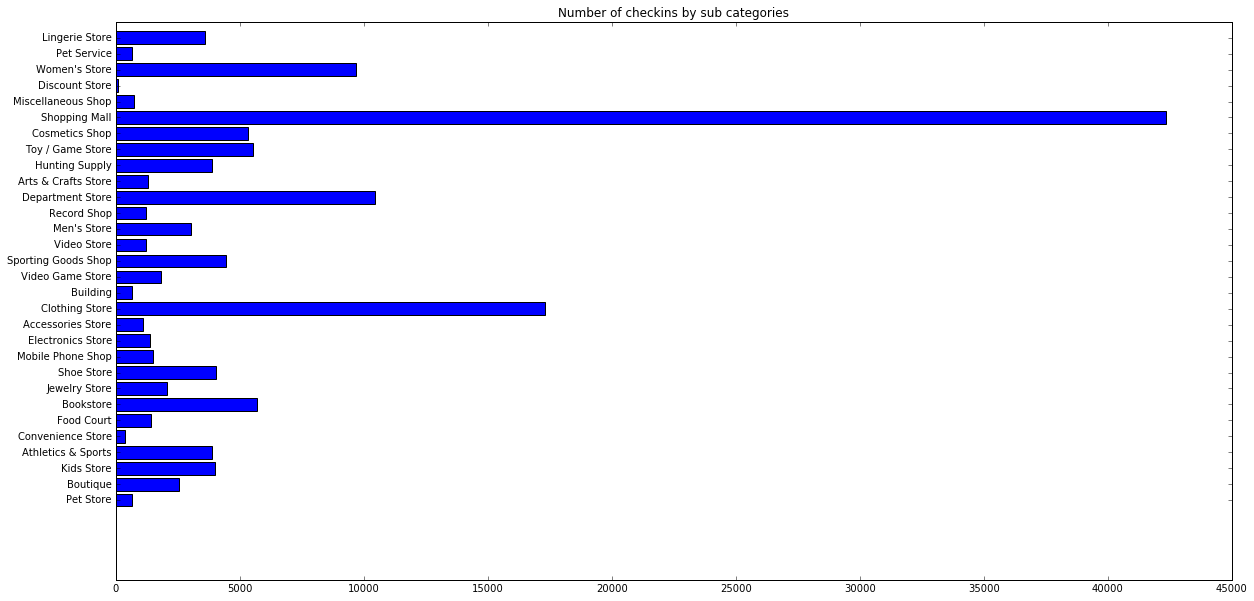

In [26]:
plt.barh(range(len(dicts)), dicts.values(), align='center')
plt.yticks(range(len(dicts)), dicts.keys())
plt.title('Number of checkins by sub categories')
plt.show()

## We can see that besides the biggest shopping mall and department store, people in Lake Grove are mostly crowded in Clothing Store, Women's Store, and bookstore. Those categories perform very well in terms of attracting people to Lake Grove for shopping.

## This is actually a good support for our own vote result. According to our reports, brands like lush and torrid receive the dominatly high votes, which represents the women's choices of seeing more clothes shops. 

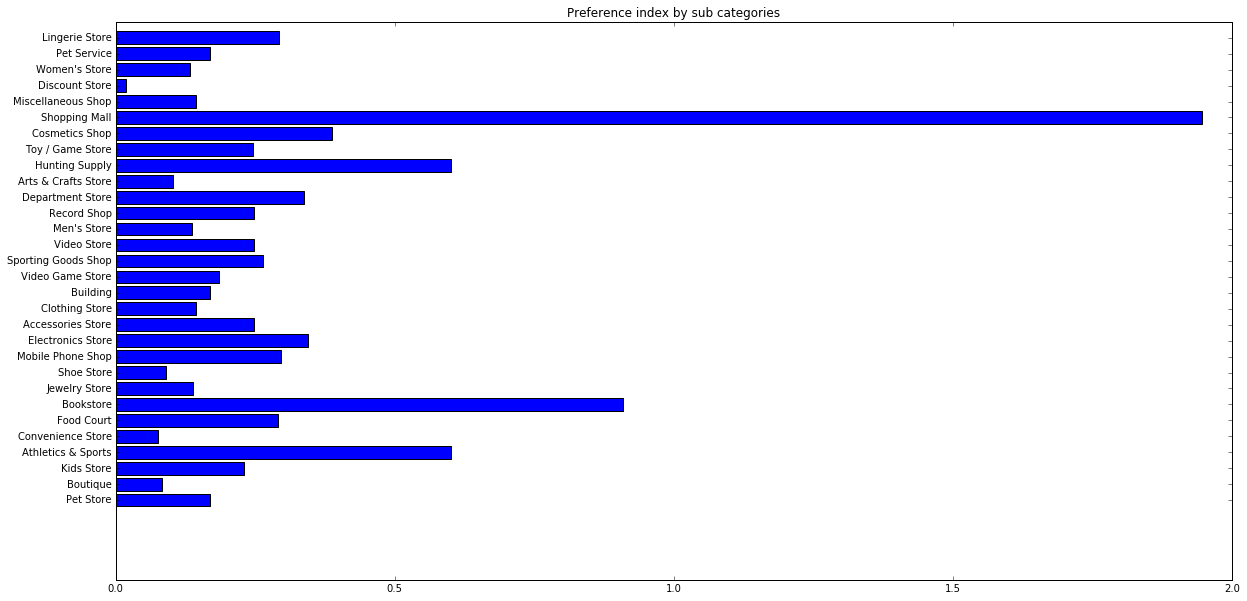

In [29]:
names1 = []
score = []
for col in data1.columns[14:]:
    names1.append(data1.groupby(col)["score"].mean().index.name)
    score.append(data1.groupby(col)["score"].mean().values[1])
dicts1 = {}
for i in range(len(names1)):
    dicts1[names1[i]] = score[i]
plt.barh(range(len(dicts1)), dicts1.values(), align='center')
plt.yticks(range(len(dicts1)), dicts1.keys())
plt.title('Preference index by sub categories')
plt.show()

## This is the preference index by different sub categories. Some top local choices are: bookstore, hunting supply and athletics sports. 

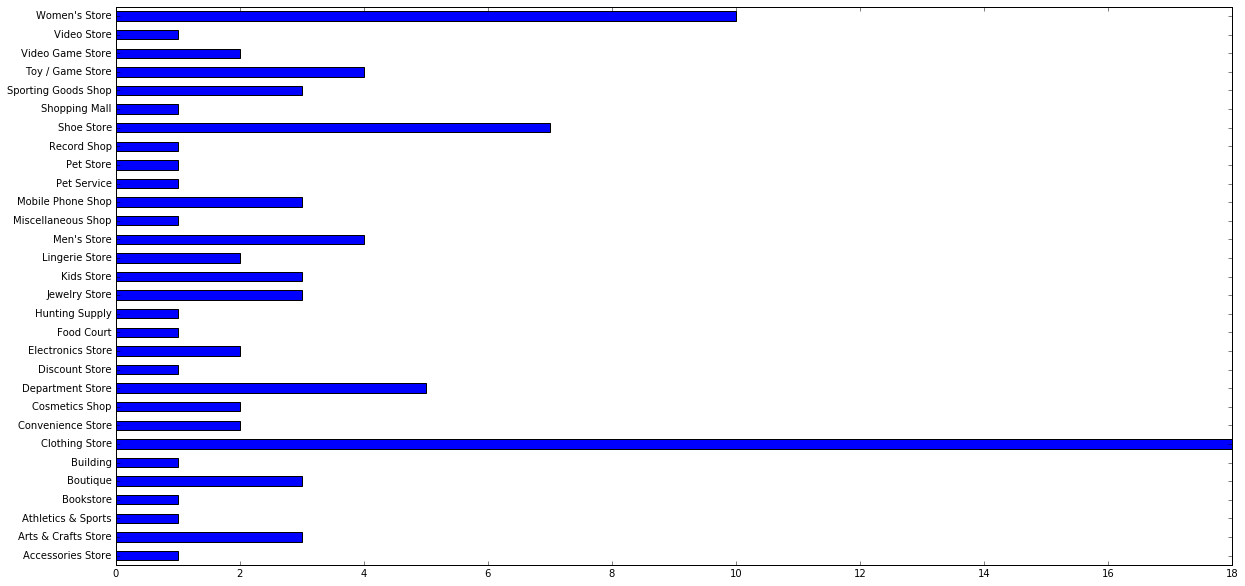

In [30]:
data1[data1.keys()[14:]].sum(axis=0).plot(kind="barh")

## However, we can see that there is only one Bookstrore, Sports and Hunting Supply store. We can see some potential for those sub categories.

## Futer work: I imagine that as we get more and more data for different locations, we can implement a simple recommender system to give some "foursquare votes" or "yelp votes" for local neighborhood. For example, in the Smith Haven case, our recommender system can vote for any potential bookstore similar to barnes noble or sports supply similar to dicks-sporting-goods ideally. This will be a good suplement to our direct votes now.